In [41]:
import numpy as np
import random
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate=0.2):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations
        self.budgets = budgets
        self.utilities = utilities
        self.costs = costs
        self.num_items = len(utilities)
        self.population = self.initialize_population()
        self.elitism_rate = elitism_rate
        self.best_fitness_history = []

    def initialize_population(self):
        return np.random.randint(2, size=(self.population_size, self.num_items))

    def fitness(self, individual):
        total_costs = np.sum(individual[:, np.newaxis] * self.costs, axis=0)
        if np.any(total_costs > self.budgets):
            return 0
        return np.sum(individual * self.utilities)

    def selection(self):
        fitnesses = np.array([self.fitness(individual) for individual in self.population])
        total_fitness = fitnesses.sum()
        if total_fitness == 0:
            probabilities = np.ones(self.population_size) / self.population_size
        else:
            probabilities = fitnesses / total_fitness
        selected_indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=probabilities)
        return self.population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.num_items - 1)
            return np.concatenate((parent1[:point], parent2[point:]))
        return parent1 if np.random.rand() < 0.5 else parent2

    def mutate(self, individual):
        for i in range(self.num_items):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def repair_ratio_utility_cost(self, individual):
        for i in range(len(self.budgets)):
            while np.sum(individual * self.costs[:, i]) > self.budgets[i]:
                included_items = individual == 1
                print("utilities", self.utilities[included_items])
                print("costs: ", self.costs[included_items, i])
                print("ratios: ", self.utilities[included_items] / self.costs[included_items, i])
                utility_to_cost_ratio = self.utilities[included_items] / self.costs[included_items, i]
                worst_item_index = np.argmin(utility_to_cost_ratio)
                actual_worst_item_index = np.where(included_items)[0][worst_item_index]
                individual[actual_worst_item_index] = 0
        return individual

    def repair_highest_utility(self, individual):
        for i in range(len(self.budgets)):
            while np.sum(individual * self.costs[:, i]) > self.budgets[i]:
                worst_item_index = np.argmax(self.utilities * individual)
                individual[worst_item_index] = 0
        return individual

    def repair_algorithm_1(self, individual):
        # Order the objects by decreasing utility
        ordered_indices = np.argsort(-self.utilities)
        costs_sum = np.sum(individual[:, np.newaxis] * self.costs, axis=0)

        # Remove objects if budgets are exceeded
        for l in ordered_indices[::-1]:
            if individual[l] == 1 and np.any(costs_sum > self.budgets):
                individual[l] = 0
                costs_sum -= self.costs[l]

        # Try to add objects back
        for l in ordered_indices:
            if individual[l] == 0 and np.all(costs_sum + self.costs[l] <= self.budgets):
                individual[l] = 1
                costs_sum += self.costs[l]

        return individual

    def run(self, repair_method):
        num_elites = int(self.population_size * self.elitism_rate)
        self.best_fitness_history = []

        for generation in range(self.num_generations):
            fitnesses = np.array([self.fitness(individual) for individual in self.population])
            elite_indices = np.argsort(fitnesses)[-num_elites:]
            elites = self.population[elite_indices]
            selected_population = self.selection()
            next_population = []

            for i in range(0, self.population_size - num_elites, 2):
                parent1, parent2 = selected_population[i], selected_population[i + 1]
                offspring1, offspring2 = self.crossover(parent1, parent2), self.crossover(parent2, parent1)
                offspring1, offspring2 = self.mutate(offspring1), self.mutate(offspring2)
                offspring1 = getattr(self, repair_method)(offspring1)
                offspring2 = getattr(self, repair_method)(offspring2)
                next_population.extend([offspring1, offspring2])

            next_population.extend(elites)
            self.population = np.array(next_population)

            best_fitness = max(fitnesses)
            self.best_fitness_history.append(best_fitness)
            # print(f'Generation {generation}: Best Fitness = {best_fitness}')

        best_solution = self.population[np.argmax([self.fitness(individual) for individual in self.population])]

        return best_solution

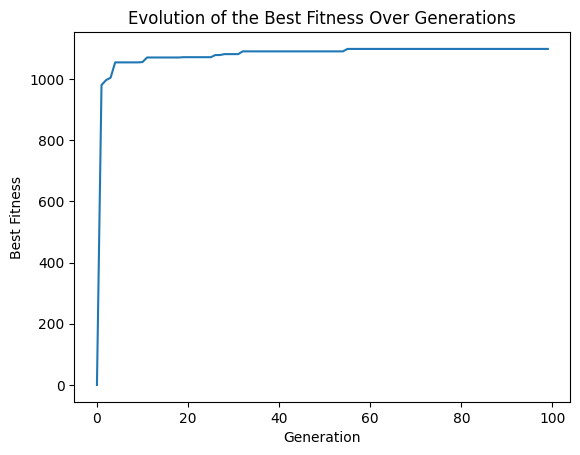

In [52]:
# Parameters
np.random.seed(0)
population_size = 100
mutation_rate = 0.1
crossover_rate = 0.8
num_generations = 100
budgets = [200, 300, 250, 350, 400]
utilities = np.random.randint(10, 100, size=50)
costs = np.random.randint(1, 50, size=(50, 5))
elitism_rate = 0.2

# Initialize and run the genetic algorithm
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution = ga.run()

# Plot the evolution of the best fitness over generations
plt.plot(ga.best_fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of the Best Fitness Over Generations')
plt.show()


# Sandbox

Generation 0: Best Fitness = 0
Generation 1: Best Fitness = 980
Generation 2: Best Fitness = 996
Generation 3: Best Fitness = 1004
Generation 4: Best Fitness = 1054
Generation 5: Best Fitness = 1054
Generation 6: Best Fitness = 1054
Generation 7: Best Fitness = 1054
Generation 8: Best Fitness = 1054
Generation 9: Best Fitness = 1054
Generation 10: Best Fitness = 1055
Generation 11: Best Fitness = 1070
Generation 12: Best Fitness = 1070
Generation 13: Best Fitness = 1070
Generation 14: Best Fitness = 1070
Generation 15: Best Fitness = 1070
Generation 16: Best Fitness = 1070
Generation 17: Best Fitness = 1070
Generation 18: Best Fitness = 1070
Generation 19: Best Fitness = 1071
Generation 20: Best Fitness = 1071
Generation 21: Best Fitness = 1071
Generation 22: Best Fitness = 1071
Generation 23: Best Fitness = 1071
Generation 24: Best Fitness = 1071
Generation 25: Best Fitness = 1071
Generation 26: Best Fitness = 1078
Generation 27: Best Fitness = 1078
Generation 28: Best Fitness = 1081


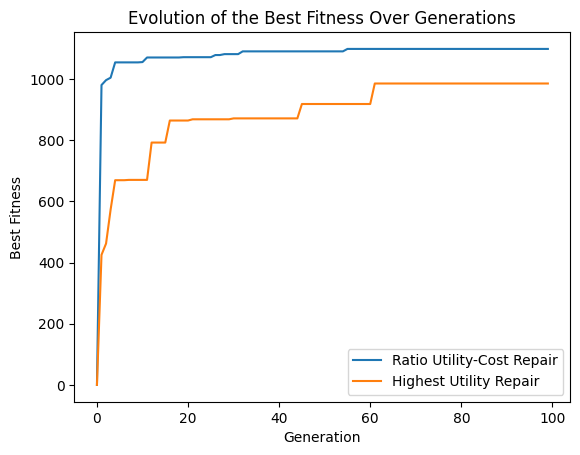

In [53]:
import numpy as np
import matplotlib.pyplot as plt

class GeneticAlgorithm:
    def __init__(self, population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate=0.2):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations
        self.budgets = budgets
        self.utilities = utilities
        self.costs = costs
        self.num_items = len(utilities)
        self.population = self.initialize_population()
        self.elitism_rate = elitism_rate
        self.best_fitness_history = []

    def initialize_population(self):
        return np.random.randint(2, size=(self.population_size, self.num_items))

    def fitness(self, individual):
        total_costs = np.sum(individual[:, np.newaxis] * self.costs, axis=0)
        if np.any(total_costs > self.budgets):
            return 0
        return np.sum(individual * self.utilities)

    def selection(self):
        fitnesses = np.array([self.fitness(individual) for individual in self.population])
        total_fitness = fitnesses.sum()
        if total_fitness == 0:
            probabilities = np.ones(self.population_size) / self.population_size
        else:
            probabilities = fitnesses / total_fitness
        selected_indices = np.random.choice(np.arange(self.population_size), size=self.population_size, p=probabilities)
        return self.population[selected_indices]

    def crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.num_items - 1)
            return np.concatenate((parent1[:point], parent2[point:]))
        return parent1 if np.random.rand() < 0.5 else parent2

    def mutate(self, individual):
        for i in range(self.num_items):
            if np.random.rand() < self.mutation_rate:
                individual[i] = 1 - individual[i]
        return individual

    def repair_ratio_utility_cost(self, individual):
        for i in range(len(self.budgets)):
            while np.sum(individual * self.costs[:, i]) > self.budgets[i]:
                included_items = individual == 1
                utility_to_cost_ratio = self.utilities[included_items] / self.costs[included_items, i]
                worst_item_index = np.argmin(utility_to_cost_ratio)
                actual_worst_item_index = np.where(included_items)[0][worst_item_index]
                individual[actual_worst_item_index] = 0
        return individual

    def repair_highest_utility(self, individual):
        for i in range(len(self.budgets)):
            while np.sum(individual * self.costs[:, i]) > self.budgets[i]:
                worst_item_index = np.argmax(self.utilities * individual)
                individual[worst_item_index] = 0
        return individual

    def run(self, repair_method):
        num_elites = int(self.population_size * self.elitism_rate)
        self.best_fitness_history = []

        for generation in range(self.num_generations):
            fitnesses = np.array([self.fitness(individual) for individual in self.population])
            elite_indices = np.argsort(fitnesses)[-num_elites:]
            elites = self.population[elite_indices]
            selected_population = self.selection()
            next_population = []

            for i in range(0, self.population_size - num_elites, 2):
                parent1, parent2 = selected_population[i], selected_population[i + 1]
                offspring1, offspring2 = self.crossover(parent1, parent2), self.crossover(parent2, parent1)
                offspring1, offspring2 = self.mutate(offspring1), self.mutate(offspring2)
                offspring1 = getattr(self, repair_method)(offspring1)
                offspring2 = getattr(self, repair_method)(offspring2)
                next_population.extend([offspring1, offspring2])

            next_population.extend(elites)
            self.population = np.array(next_population)

            best_fitness = max(fitnesses)
            self.best_fitness_history.append(best_fitness)
            print(f'Generation {generation}: Best Fitness = {best_fitness}')

        best_solution = self.population[np.argmax([self.fitness(individual) for individual in self.population])]

        return best_solution

# Define parameters
np.random.seed(0)
population_size = 100
mutation_rate = 0.1
crossover_rate = 0.8
num_generations = 100
budgets = [200, 300, 250, 350, 400]
utilities = np.random.randint(10, 100, size=50)
costs = np.random.randint(1, 50, size=(50, 5))
elitism_rate = 0.2

# Initialize and run the genetic algorithm with ratio utility cost repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_ratio = ga.run('repair_ratio_utility_cost')
fitness_history_ratio = ga.best_fitness_history

# Initialize and run the genetic algorithm with highest utility repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_highest = ga.run('repair_highest_utility')
fitness_history_highest = ga.best_fitness_history

# Plot the evolution of the best fitness over generations for both repair methods
plt.plot(fitness_history_ratio, label='Ratio Utility-Cost Repair')
plt.plot(fitness_history_highest, label='Highest Utility Repair')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of the Best Fitness Over Generations')
plt.legend()
plt.show()


Generation 0: Best Fitness = 0
Generation 1: Best Fitness = 653.4693877551022
Generation 2: Best Fitness = 675.5102040816327
Generation 3: Best Fitness = 675.5102040816327
Generation 4: Best Fitness = 688.3673469387755
Generation 5: Best Fitness = 688.3673469387755
Generation 6: Best Fitness = 694.8979591836735
Generation 7: Best Fitness = 694.8979591836735
Generation 8: Best Fitness = 694.8979591836735
Generation 9: Best Fitness = 694.8979591836735
Generation 10: Best Fitness = 699.5918367346939
Generation 11: Best Fitness = 699.5918367346939
Generation 12: Best Fitness = 699.5918367346939
Generation 13: Best Fitness = 699.5918367346939
Generation 14: Best Fitness = 699.5918367346939
Generation 15: Best Fitness = 700.408163265306
Generation 16: Best Fitness = 700.408163265306
Generation 17: Best Fitness = 701.2244897959183
Generation 18: Best Fitness = 701.2244897959183
Generation 19: Best Fitness = 701.2244897959183
Generation 20: Best Fitness = 701.2244897959183
Generation 21: Best 

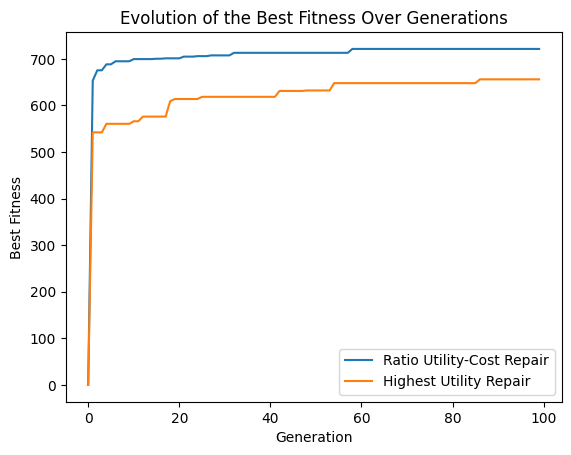

In [54]:
# Define parameters
np.random.seed(0)
population_size = 100
mutation_rate = 0.1
crossover_rate = 0.8
num_generations = 100
budgets = [200, 300, 250, 350, 400]

# Generate utilities and costs such that higher utility values are associated with higher costs
utilities = np.linspace(10, 100, 50)
costs = np.random.rand(50, 5) * utilities[:, np.newaxis]

elitism_rate = 0.2

# Initialize and run the genetic algorithm with ratio utility cost repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_ratio = ga.run('repair_ratio_utility_cost')
fitness_history_ratio = ga.best_fitness_history

# Initialize and run the genetic algorithm with highest utility repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_highest = ga.run('repair_highest_utility')
fitness_history_highest = ga.best_fitness_history

# Plot the evolution of the best fitness over generations for both repair methods
plt.plot(fitness_history_ratio, label='Ratio Utility-Cost Repair')
plt.plot(fitness_history_highest, label='Highest Utility Repair')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of the Best Fitness Over Generations')
plt.legend()
plt.show()

utilités: [54 57 74 77 77 19 93 31 46 97 80 98 98 22 68 75 49 97 56 98 91 47 35 87
 82 19 30 90 79 89 57 74 92 98 59 39 29 29 24 49 42 75 19 67 42 41 84 33
 45 85]
couts: [[29 35  1  1 37]
 [ 6 39 41 18 16]
 [ 5 42 43 32  2]
 [ 2 40 42 36 39]
 [12 47 19 28  1]
 [15 36 13 43 21]
 [12  5  7  5 48]
 [ 4 13 37 41 15]
 [16 21 36 24 16]
 [14 22 49  6 42]
 [36  1 32  6 31]
 [ 1 37 35 49 30]
 [ 4 35 43 14 49]
 [40 22 10  1 11]
 [44 24  3 35 36]
 [31  4 19 47 36]
 [21 18 28 15 42]
 [ 2 37 11 23 44]
 [41 12  3 17 33]
 [ 1 39 20 47 43]
 [41 14 31 25  3]
 [ 4 31 35 44 14]
 [49 41  9 20 32]
 [ 9 27  3  4 45]
 [15 33  5  4 46]
 [12 23 14 46 12]
 [17 25 30 22 47]
 [26 17 20 34 41]
 [33 37  7 22 32]
 [14  8 25 16 42]
 [19 41 16 12 39]
 [48 30  2 32 45]
 [25 25  4 19 48]
 [ 4 43 13 39 36]
 [23  6 24 44 33]
 [12 41 21 11 44]
 [38 29 48 41  3]
 [28 20 26 24 47]
 [21 30  4 36 40]
 [10 10 42 24  4]
 [47 27 45  4 32]
 [10 11 28 46  8]
 [40 22 34 45 35]
 [35 25 34  6 41]
 [37  1 12 35  6]
 [17  9  2 18 49]
 

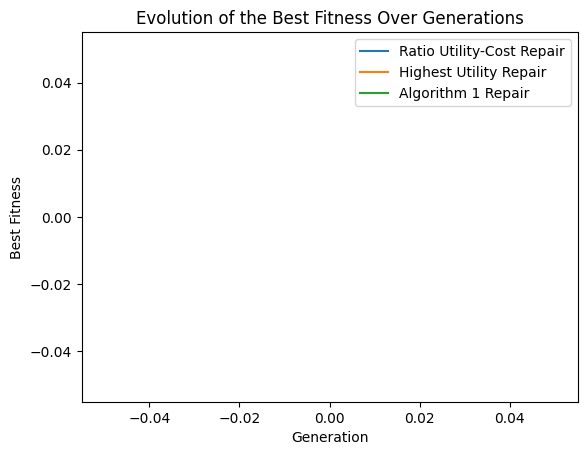

In [62]:
# # Define parameters
# np.random.seed(0)
# population_size = 100
# mutation_rate = 0.1
# crossover_rate = 0.8
# num_generations = 100
# budgets = [200, 300, 250, 350, 400]

# # Generate utilities and costs such that higher utility values are associated with higher costs
# utilities = np.linspace(10, 100, 50)
# costs = np.random.rand(50, 5) * utilities[:, np.newaxis]

# elitism_rate = 0.2

# Define parameters
np.random.seed(0)
population_size = 100
mutation_rate = 0.1
crossover_rate = 0.8
num_generations = 1
budgets = [200, 300, 250, 350, 400]
utilities = np.random.randint(10, 100, size=50)
costs = np.random.randint(1, 50, size=(50, 5))
elitism_rate = 0.2

print("utilités:", utilities)
print("couts:", costs)

# Initialize and run the genetic algorithm with ratio utility cost repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_ratio = ga.run('repair_ratio_utility_cost')
fitness_history_ratio = ga.best_fitness_history

# Initialize and run the genetic algorithm with highest utility repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_highest = ga.run('repair_highest_utility')
fitness_history_highest = ga.best_fitness_history

# Initialize and run the genetic algorithm with Algorithm 1 repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_algorithm_1 = ga.run('repair_algorithm_1')
fitness_history_algorithm_1 = ga.best_fitness_history

# Plot the evolution of the best fitness over generations for all repair methods
plt.plot(fitness_history_ratio, label='Ratio Utility-Cost Repair')
plt.plot(fitness_history_highest, label='Highest Utility Repair')
plt.plot(fitness_history_algorithm_1, label='Algorithm 1 Repair')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of the Best Fitness Over Generations')
plt.legend()
plt.show()


## Same utilities, different costs

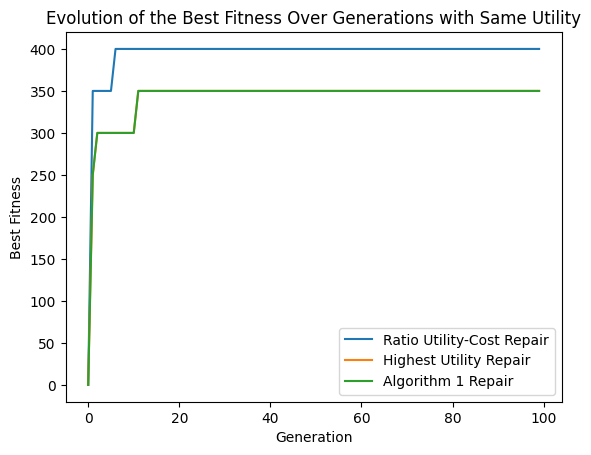

In [58]:
# Define parameters
np.random.seed(0)
population_size = 100
mutation_rate = 0.1
crossover_rate = 0.8
num_generations = 100
budgets = [200, 300, 250, 350, 400]

# Generate utilities with the same value for all objects
utilities = np.ones(50) * 50

# Generate random costs for each object in various dimensions
costs = np.random.rand(50, 5) * 100

elitism_rate = 0.2

# Initialize and run the genetic algorithm with ratio utility cost repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_ratio = ga.run('repair_ratio_utility_cost')
fitness_history_ratio = ga.best_fitness_history

# Initialize and run the genetic algorithm with highest utility repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_highest = ga.run('repair_highest_utility')
fitness_history_highest = ga.best_fitness_history

# Initialize and run the genetic algorithm with Algorithm 1 repair method
ga = GeneticAlgorithm(population_size, mutation_rate, crossover_rate, num_generations, budgets, utilities, costs, elitism_rate)
best_solution_algorithm_1 = ga.run('repair_algorithm_1')
fitness_history_algorithm_1 = ga.best_fitness_history

# Plot the evolution of the best fitness over generations for all repair methods
plt.plot(fitness_history_ratio, label='Ratio Utility-Cost Repair')
plt.plot(fitness_history_highest, label='Highest Utility Repair')
plt.plot(fitness_history_algorithm_1, label='Algorithm 1 Repair')
plt.xlabel('Generation')
plt.ylabel('Best Fitness')
plt.title('Evolution of the Best Fitness Over Generations with Same Utility')
plt.legend()
plt.show()
